In [1]:
# Auto-reload setup
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
print(sys.executable)

sys.path.append(os.path.abspath("../src"))
from plotting_price_drivers import *
from merit_order import *

/usr/local/bin/python3


In [3]:
filepath = '../data/clean/exploitable/merged_data.csv'
save_path = None
df = pd.read_csv(filepath, parse_dates=['Date'])

Nuclear


/Users/gonot/Desktop/Energy project/epex-spot-analysis/src/plotting_price_drivers.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


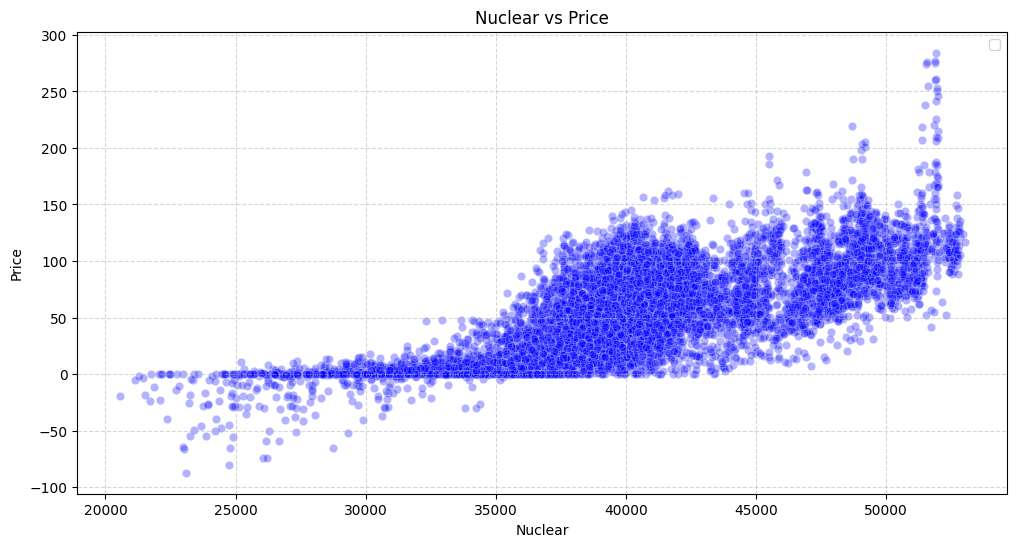

In [4]:
plot_scatter_price_driver(df, '2024', '2025', 'Nuclear')

['Load', 'Fossil_gas', 'Nuclear', 'Solar', 'Wind_Offshore', 'Wind_Onshore']
Load
Fossil_gas
Nuclear
Solar
Wind_Offshore
Wind_Onshore


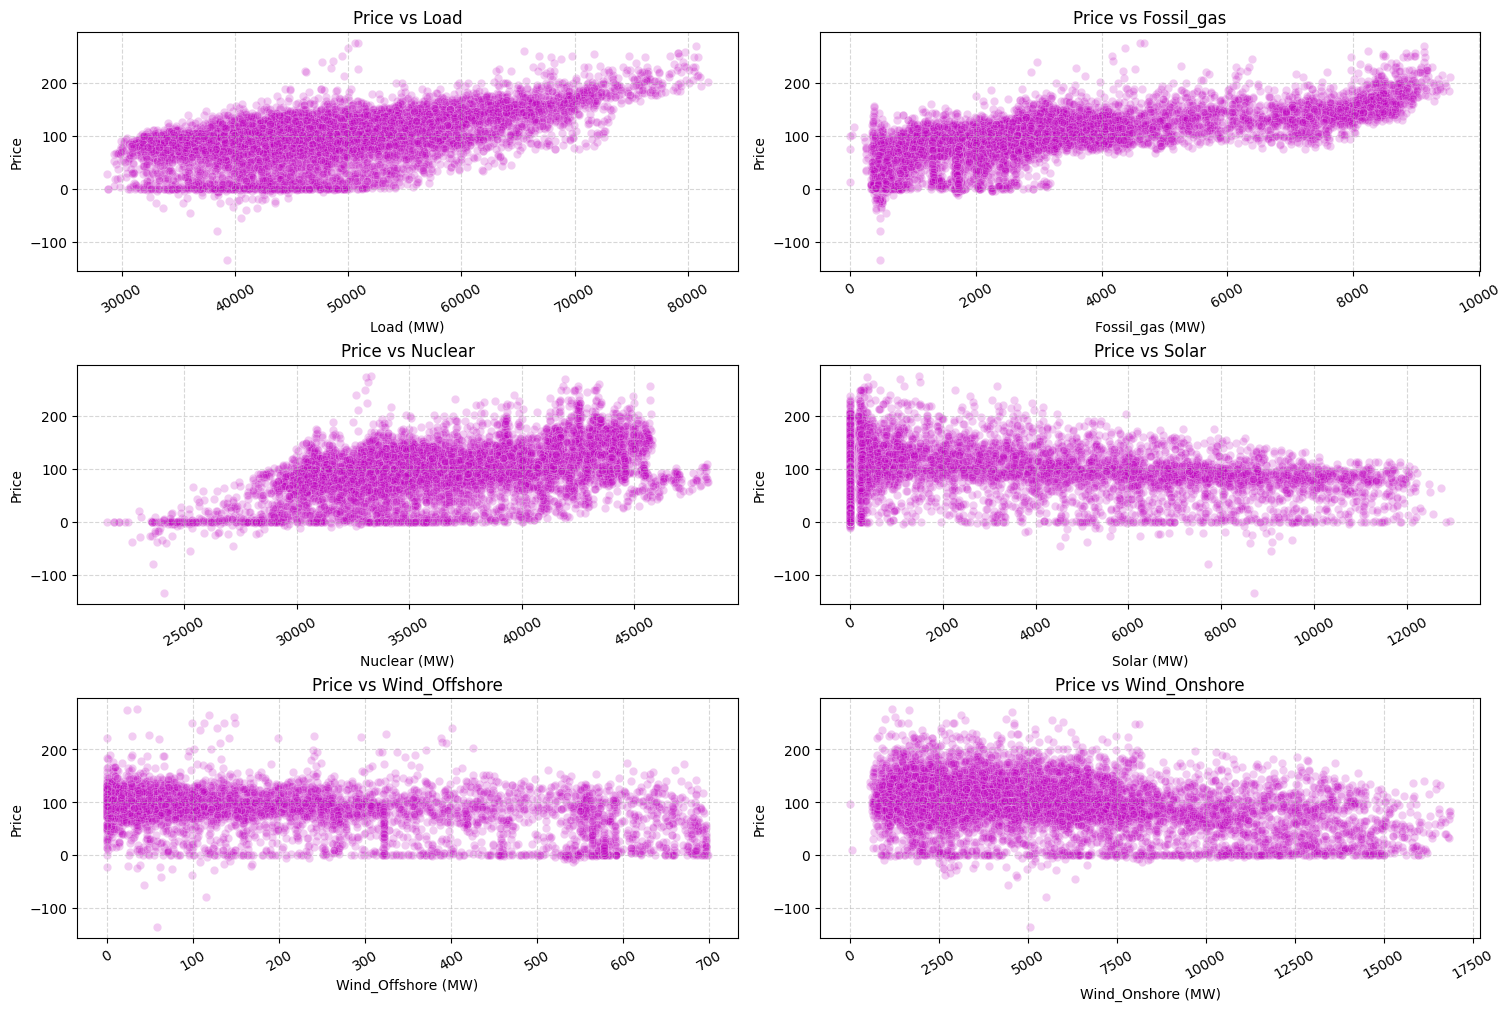

In [5]:
drivers = extract_drivers_list(df)
# drivers = ['Solar']
print(drivers)
# multiple_plot_scatter_price_driver1(df, drivers, n_cols=1, figsize=(12,6))
multiple_plot_scatter_price_driver1(df,'2023', '2024', drivers)

/Users/gonot/Desktop/Energy project/epex-spot-analysis/src/plotting_price_drivers.py:77: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_means = df_temp.groupby('bin')[price_col].mean()


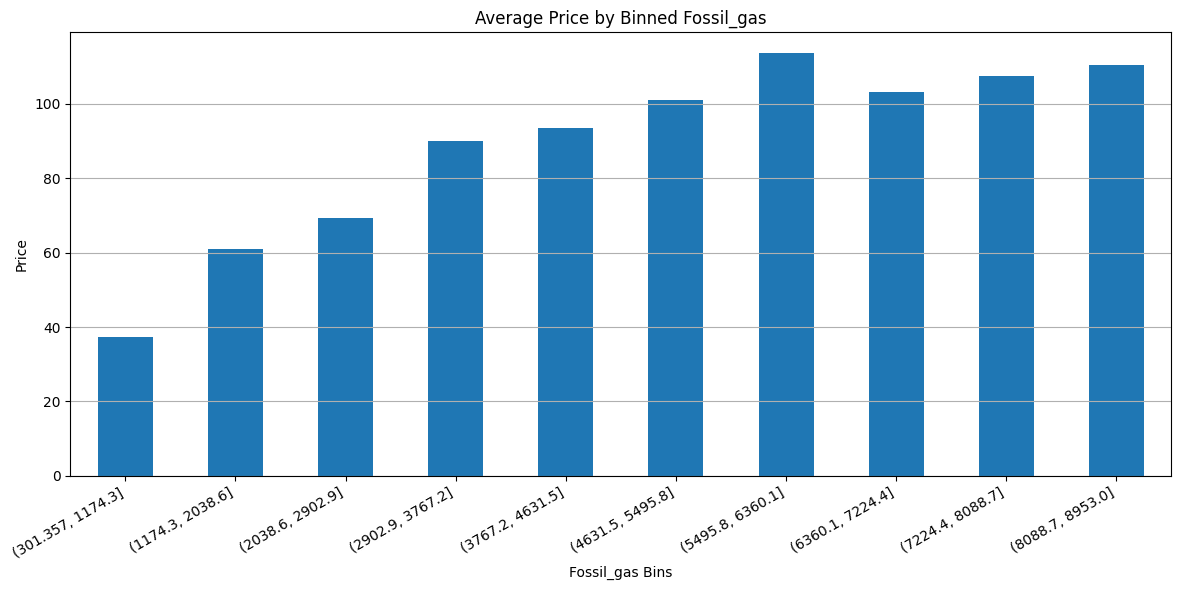

In [6]:
driver_col = 'Fossil_gas'
# driver_col = 'Wind_Onshore'
plot_price_by_binned_driver(df, '2024', '2025', driver_col)

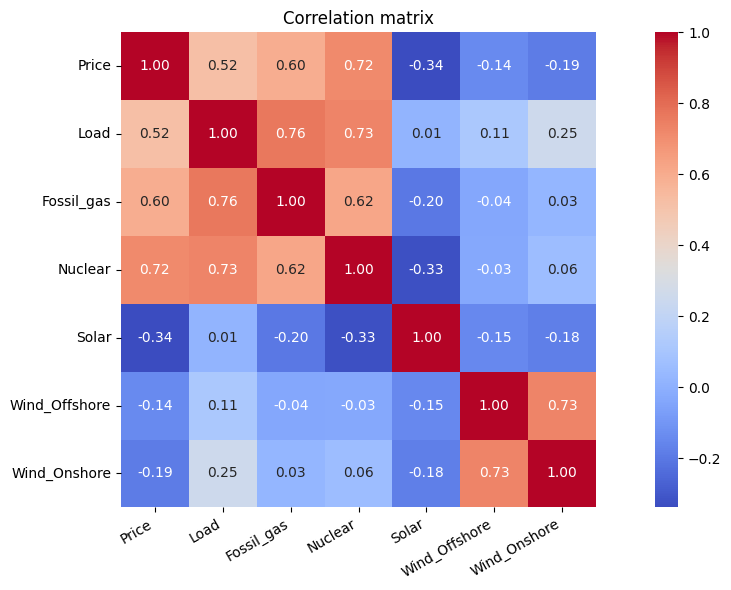

In [7]:
drivers = extract_drivers_list(df, non_driver='Date')
plot_correlation_matrix(df, drivers, '2024', '2025')

Main positive drivers (Same behaviour, if one increase, the other increase too) for electricity prices: Nuclear, Fossil gas, Total Load
Main negative drivers (Opposite behaviour, if one increase, on the contrary, the other decrease) for electricity prices: Solar, Wind Onshore

If the correlation number is close to 0, it means the driver doesn't have much influence on the prices (independant variables). It's the opposite if it's absolute value is close to 1 (colinearity of the variables)

The downside of this correlation matrix is that it doesn't take into account for effects of others drivers on a specific driver. For example, Solar and Wind might have an influence on Nuclear production, thus influencing indirectly the depedance of electricity prices due to Nuclear.

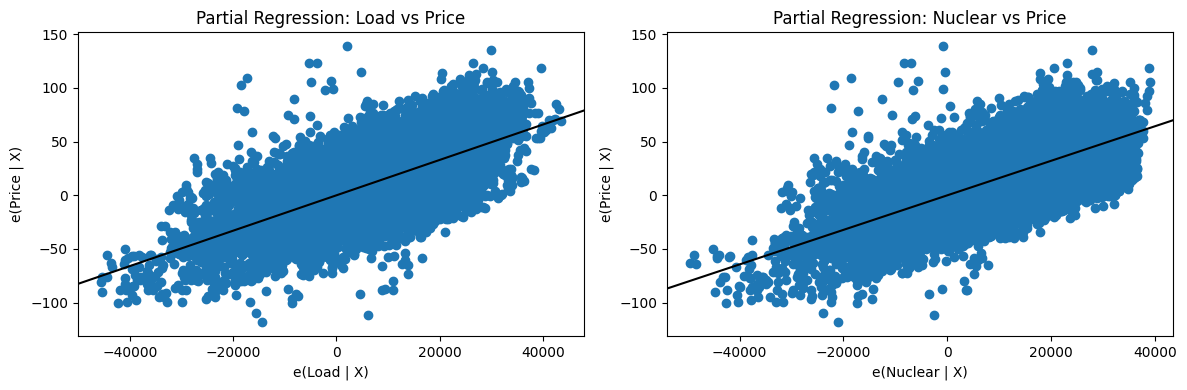

In [8]:
plot_multiple_partial_regressions(df=df,target='Price',drivers=['Load', 'Nuclear'],controls=['Fossil_gas', 'Solar', 'Wind_Onshore', 'Wind_Offshore'],start_year=2024,end_year=2024,figsize=(6,4))

In [9]:
merit_order_curve(df, '2021-01-01 10:00:00')

TypeError: 'set' type is unordered